# NetworkX로 포켓몬 보기

참고 : https://www.kaggle.com/kingburrito666/pokemon-complete-analysis-networkx/notebook

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from subprocess import check_output
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
data = pd.read_csv('data/Pokemon.csv', index_col=0)
data.shape

(800, 12)

## 데이터 기본 정보 보기

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [4]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
print(len(data.isnull().any()))
data.isnull().any()

12


Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [6]:
# 결측치 보기
data.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### 결측치 처리 
* null 값을 0으로 대체

In [7]:
data['Type 2'].replace(np.nan, '0', inplace=True)

* 변환이 잘 되었나 확인

In [8]:
data['Type 2'].head(10)

#
1    Poison
2    Poison
3    Poison
3    Poison
4         0
5         0
6    Flying
6    Dragon
6    Flying
7         0
Name: Type 2, dtype: object

In [9]:
# n개의 unique 갯수를 반환
print("Number of pokemon are: {}".format(str(data['Name'].nunique())))

Number of pokemon are: 800


In [10]:
g = nx.Graph()

In [11]:
g = nx.from_pandas_dataframe(data,source='Name',target='Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 800
Average degree:   1.9560


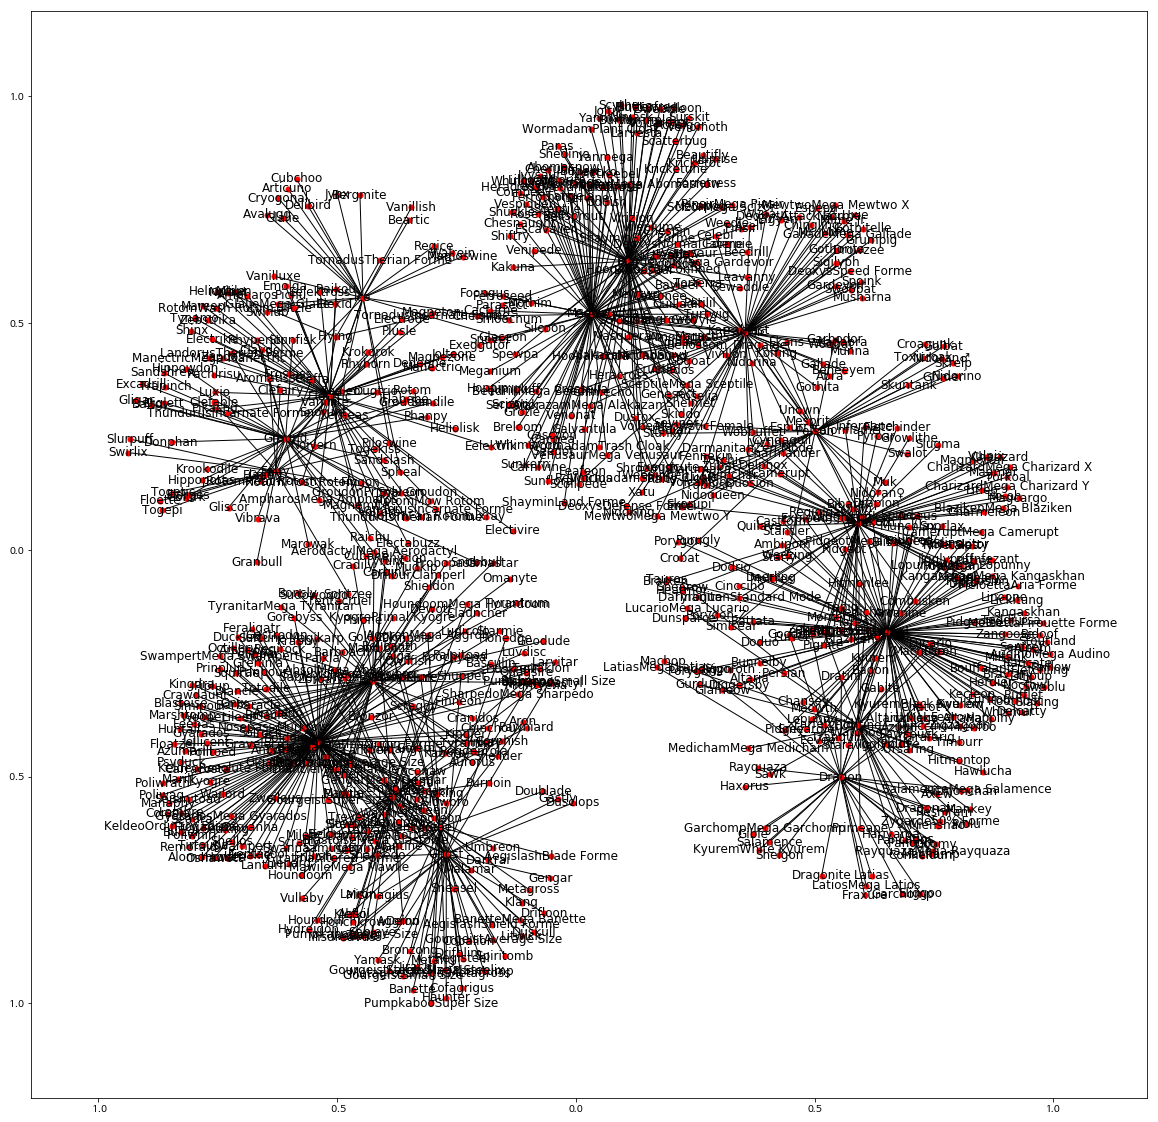

In [12]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='red')
plt.show()

In [13]:
gen1 = data[data.Generation == 1]

In [14]:
types = gen1['Type 1']
types.value_counts()

Water       31
Normal      24
Poison      14
Bug         14
Fire        14
Grass       13
Psychic     11
Rock        10
Electric     9
Ground       8
Fighting     7
Ghost        4
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [15]:
len(types.unique())

15

In [16]:
explode = np.arange(len(types.unique())) * 0.01
explode

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14])

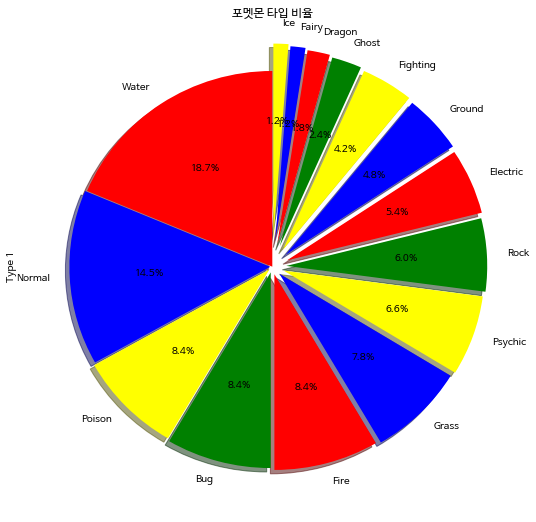

In [17]:
colors = [ 'red', 'blue', 'yellow', 'green' ]
types.value_counts().plot.pie(
    explode = explode, # 파이의 뒷부분이 좀 더 잘 보이도록 넘치게 표시
    colors = colors,
    title = '포멧몬 타입 비율',
    autopct = '%1.1f%%', # 비율 출력
    shadow=True,
    startangle=90,
    figsize=(9,9)
)

In [18]:
# 전설 포켓몬 여부
legenderay_gen1 = gen1.groupby('Legendary').size()
legenderay_gen1

Legendary
False    160
True       6
dtype: int64

## 전설 포켓몬 비율

In [19]:
types = gen1['Legendary']
explode = np.arange(len(types.unique())) * 0.01
explode

array([0.  , 0.01])

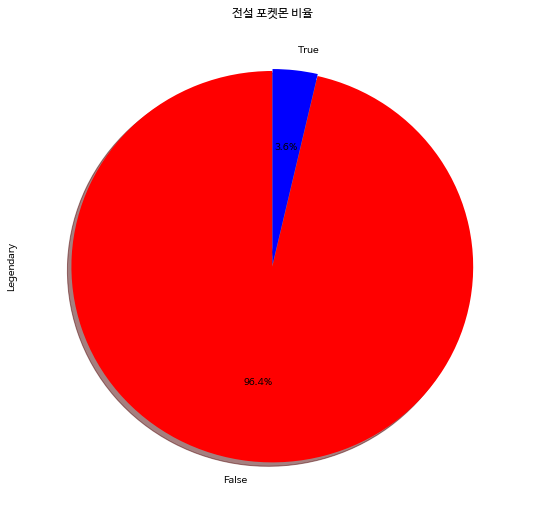

In [20]:
types.value_counts().plot.pie(
    explode = explode,
    colors = colors,
    title = '전설 포켓몬 비율',
    autopct = '%1.1f%%',
    shadow = True,
    startangle = 90,
    figsize = (9, 9)
)

## 전체 generation에서 전설 포켓몬 비율